Lien vers l'article de Jaddo : <http://www.jaddo.fr/2016/06/19/et-mes-fesses-elles-sont-roses-mes-fesses/>.

# L'exemple de Jaddo

> La probabilité qu’a l’examen de bien trouver l’anomalie s’il y en a une s’appelle la **sensibilité**.

> La probabilité qu’a l’examen d’être normal quand il n’y a pas d’anomalie s’appelle la **spécificité**.

Valeurs d'exemple :

- sensibilité : 90 %
- spécificité : 95 %

In [3]:
n = 100000
sensi = 0.90
speci = 0.95
preva = 0.01
sick = n * preva
healthy = n - sick
true_pos = sick * sensi
false_neg = sick * (1 - sensi)
true_neg = healthy * speci
false_pos = healthy * (1 - speci)
true_pos, false_neg, true_neg, false_pos

(900.0, 99.99999999999997, 94050.0, 4950.000000000005)

> La probabilité que vous ayez vraiment une anomalie si le test dit qu’il y en a une, ça s’appelle la **valeur prédictive positive**. (**VPP** pour les intimes).

> La probabilité que vous n’ayez pas d’anomalie si le test dit que tout va bien, ça s’appelle la **valeur prédictive négative** (**VPN**).

In [4]:
def compute_vpp_vpn(preva, sensi, speci):
    n = 100000
    sick = n * preva
    healthy = n - sick
    true_pos = sick * sensi
    false_neg = sick * (1 - sensi)
    true_neg = healthy * speci
    false_pos = healthy * (1 - speci)
    vpp = true_pos / (true_pos + false_pos)
    vpn = true_neg / (true_neg + false_neg)
    return vpp, vpn

In [5]:
vpp, vpn = compute_vpp_vpn(preva, sensi, speci)
vpp, vpn

(0.15384615384615372, 0.9989378651088688)

# Interactif 

In [6]:
from ipywidgets import interact, fixed

In [7]:
@interact
def crunch_numbers(sensi=(0, 1., 0.01), speci=(0, 1., 0.01), preva=(0, 1., 0.01)):
    """Calcul et arbre des différents chiffres."""
    n = 100000
    sick = n * preva
    healthy = n - sick
    true_pos = sick * sensi
    false_neg = sick * (1 - sensi)
    true_neg = healthy * speci
    false_pos = healthy * (1 - speci)
    vpp = true_pos / (true_pos + false_pos)
    vpn = true_neg / (true_neg + false_neg)
    print('sick: {:n}, healthy: {:n}'.format(sick, healthy))
    print('true_positives: {:n}, false_negatives: {:n}'.format(true_pos, false_neg))
    print('true_negatives: {:n}, false_positives: {:n}'.format(true_neg, false_pos))
    print('vpp: {:.2f}, vpn: {:.2f}'.format(vpp, vpn))

# Un graphique en 2d 

In [8]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [9]:
%config InlineBackend.figure_format = 'retina'

In [10]:
plt.rcParams['figure.dpi'] = 100

In [11]:
sensi_grid = np.linspace(0.01, 1, num=50)[:, np.newaxis] 
speci_grid = np.linspace(0.01, 1, num=100)[np.newaxis, :]

In [12]:
n = 100000
sick = n * preva
healthy = n - sick
true_pos = sick * sensi_grid
false_neg = sick * (1 - sensi_grid)
true_neg = healthy * speci_grid
false_pos = healthy * (1 - speci_grid)
vpp = true_pos / (true_pos + false_pos)
vpn = true_neg / (true_neg + false_neg)

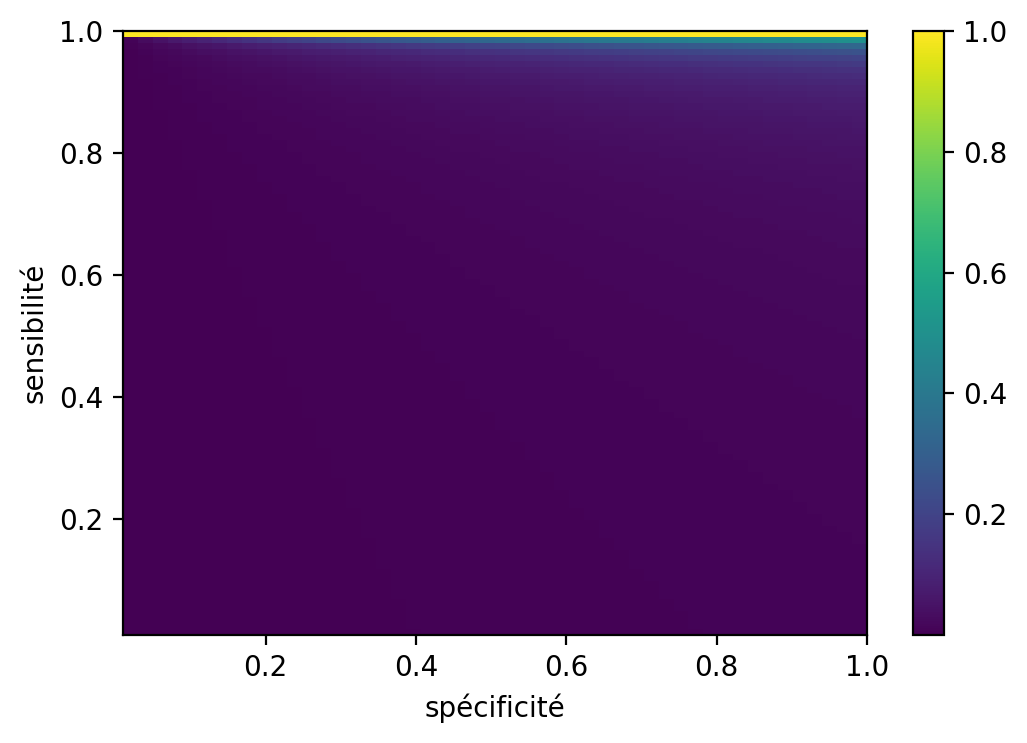

In [13]:
plt.imshow(vpp.T, aspect='auto', origin='lower', 
           extent=(sensi_grid.min(), sensi_grid.max(), speci_grid.min(), speci_grid.max()))
plt.colorbar()
plt.xlabel('spécificité')
plt.ylabel('sensibilité')

On le rend interactif :

In [14]:
@interact
def vpp_vpn_plot(preva=(0.01, 1, 0.01)):
    n = 100000
    sick = n * preva
    healthy = n - sick
    true_pos = sick * sensi_grid
    false_neg = sick * (1 - sensi_grid)
    true_neg = healthy * speci_grid
    false_pos = healthy * (1 - speci_grid)
    vpp = true_pos / (true_pos + false_pos)
    vpn = true_neg / (true_neg + false_neg)
    
    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    plt.imshow(vpp.T, aspect='auto', origin='lower', 
           extent=(sensi_grid.min(), sensi_grid.max(), speci_grid.min(), speci_grid.max()))
    plt.colorbar()
    plt.xlabel('spécificité')
    plt.ylabel('sensibilité')
    plt.title('VPP')
    
    plt.subplot(122)
    plt.imshow(vpn.T, aspect='auto', origin='lower', 
           extent=(sensi_grid.min(), sensi_grid.max(), speci_grid.min(), speci_grid.max()))
    plt.colorbar()
    plt.xlabel('spécificité')
    plt.ylabel('sensibilité')
    plt.title('VPN')

    plt.tight_layout()
    plt.show()

# Reproduction de l'illustration de Jaddo 

![img jaddo](http://www.jaddo.fr/wp-content/uploads/2016/03/vpp-vpn1.png)

In [16]:
@interact
def draw_figure(sensi = (0.01, 1., 0.01), speci = (0.01, 1., 0.01), preva = (0.01, 1., 0.01)):

    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111, autoscale_on=False, xlim=(-15, 20), ylim=(-5, 1))

    # plotting options
    bbox_dict = dict(boxstyle="round",
                                fc=(1.0, 0.7, 0.7),
                                ec=(1., .5, .5))
    size = 12.5
    dx = 7.5
    dy = 2
    # test data

    sick = n * preva
    healthy = n - sick
    true_pos = sick * sensi
    false_neg = sick * (1 - sensi)
    true_neg = healthy * speci
    false_pos = healthy * (1 - speci)
    true_pos, false_neg, true_neg, false_pos

    ann = ax.annotate('{:n} patients (prévalence {:.1f} %)'.format(n, preva * 100),
                      xy=(0., 0), xycoords='data', ha='center',
                      size=size,
                      bbox=bbox_dict)

    ax.annotate('{:n} malades'.format(sick),
                      xy=(-dx, -dy), xycoords='data', ha='center',
                      size=size,
                      bbox=bbox_dict)

    ax.annotate('{:n} en bonne santé'.format(healthy),
                      xy=(dx, -dy), xycoords='data', ha='center',
                      size=size,
                      bbox=bbox_dict)


    ax.annotate('{:n} faux négatifs'.format(false_neg),
                      xy=(-2*dx, -2*dy), xycoords='data', ha='center',
                      size=size,
                      bbox=bbox_dict)

    ax.annotate('{:n} dépistés'.format(true_pos),
                      xy=(-0.5*dx, -2*dy), xycoords='data', ha='center',
                      size=size,
                      bbox=bbox_dict)

    ax.annotate('{:n} faux positifs'.format(false_pos),
                      xy=(0.5*dx, -2*dy), xycoords='data', ha='center',
                      size=size,
                      bbox=bbox_dict)

    ax.annotate('{:n} tranquilles chez eux'.format(true_neg),
                      xy=(2*dx, -2*dy), xycoords='data', ha='center',
                      size=size,
                      bbox=bbox_dict)

    arrow_width=0.1
    arrow_hl = 1.5
    plt.arrow(0, 0, dx,  -dy*0.8, length_includes_head=True, width=arrow_width, head_length=arrow_hl, fc='k')
    plt.arrow(0, 0, -dx, -dy*0.8, length_includes_head=True, width=arrow_width, head_length=arrow_hl, fc='k')

    plt.arrow(dx, -dy, dx,  -dy*0.8, length_includes_head=True, width=arrow_width, head_length=arrow_hl, fc='k')
    plt.arrow(dx, -dy, -0.5*dx, -dy*0.8, length_includes_head=True, width=arrow_width, head_length=arrow_hl, fc='k')

    plt.arrow(-dx, -dy, -dx,  -dy*0.8, length_includes_head=True, width=arrow_width, head_length=arrow_hl, fc='k')
    plt.arrow(-dx, -dy, 0.5*dx, -dy*0.8, length_includes_head=True, width=arrow_width, head_length=arrow_hl, fc='k')
    vpp, vpn = compute_vpp_vpn(preva, sensi, speci)
    plt.text(0, 0.5, "propriétés du test : \nsensibilité {:.0f} %, spécificité {:.0f} %\nVPP : {:.0f} %, VPN : {:.0f} %".format(sensi * 100, speci * 100, vpp*100, vpn*100), ha='center')
    plt.axis('off')
    plt.show()

## L'exemple de Jaddo

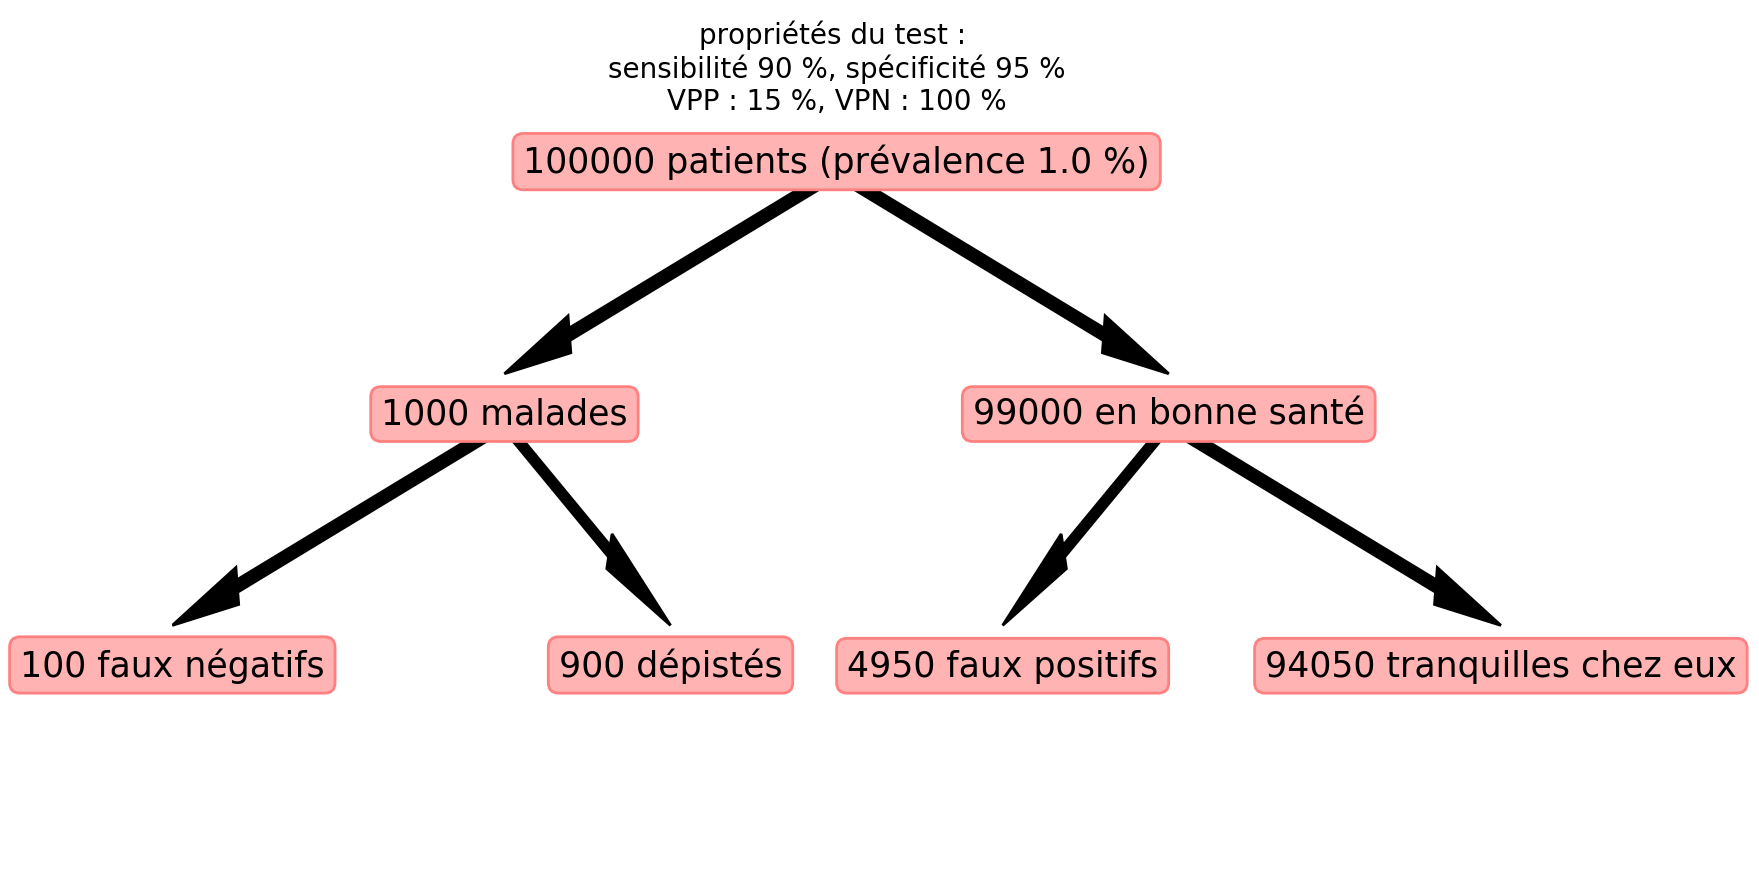

In [17]:
draw_figure(preva=.01, sensi=.90, speci=.95)

## PSA valeur basse spécificité

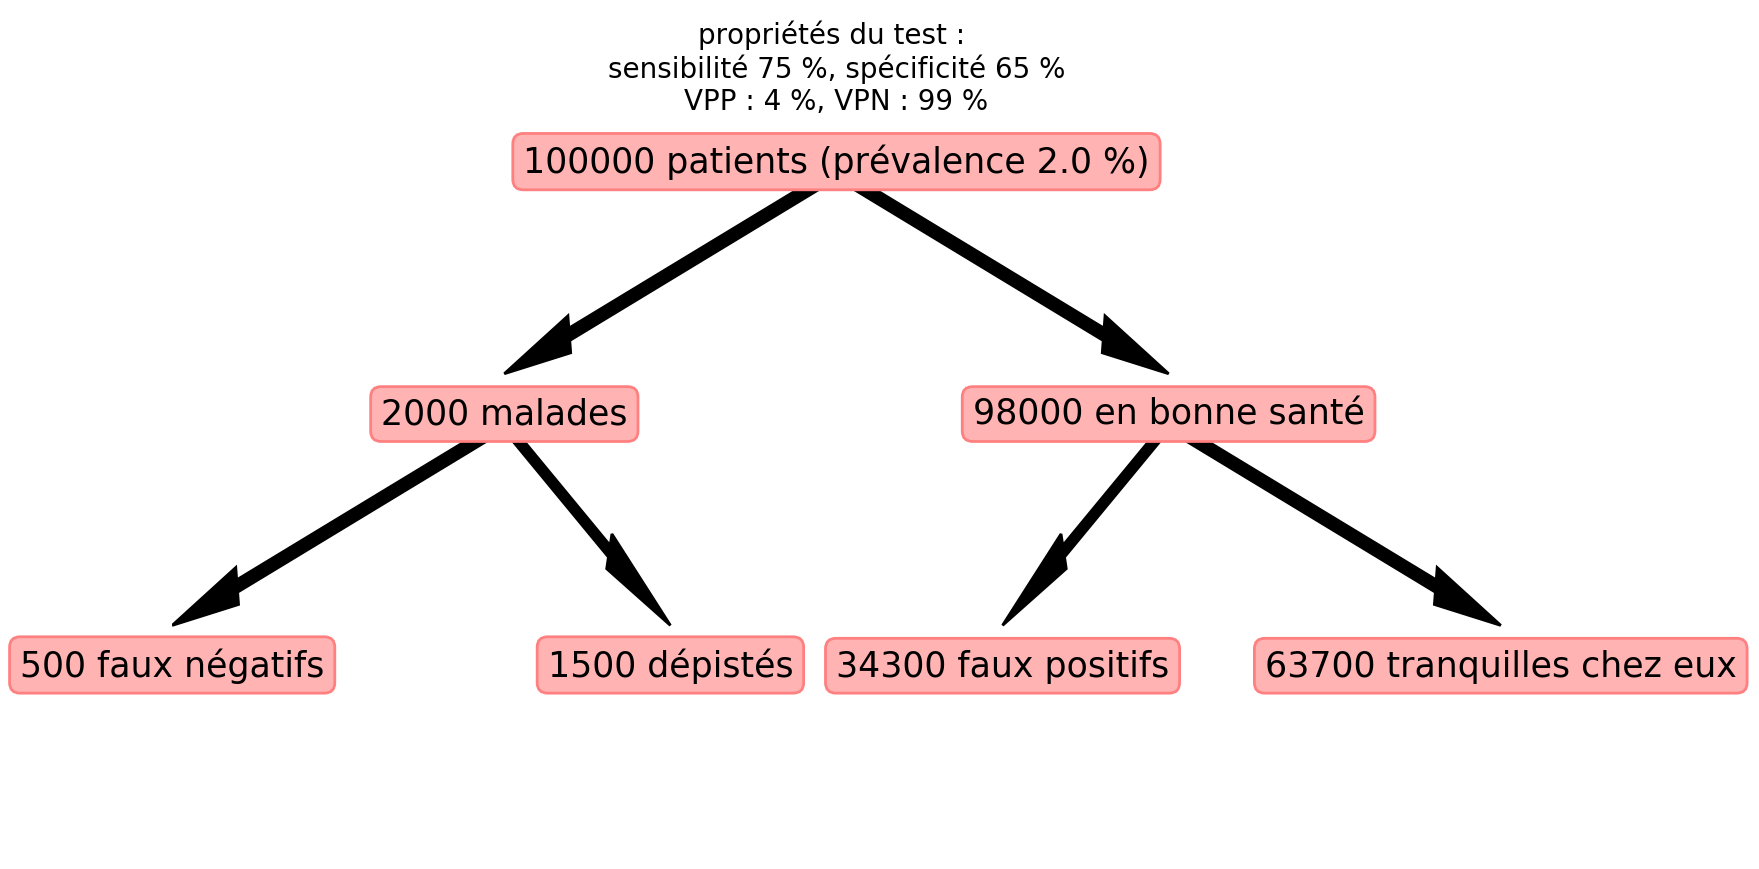

In [18]:
draw_figure(preva=.02, sensi=.75, speci=.65)

## PSA valeur haute spécificité

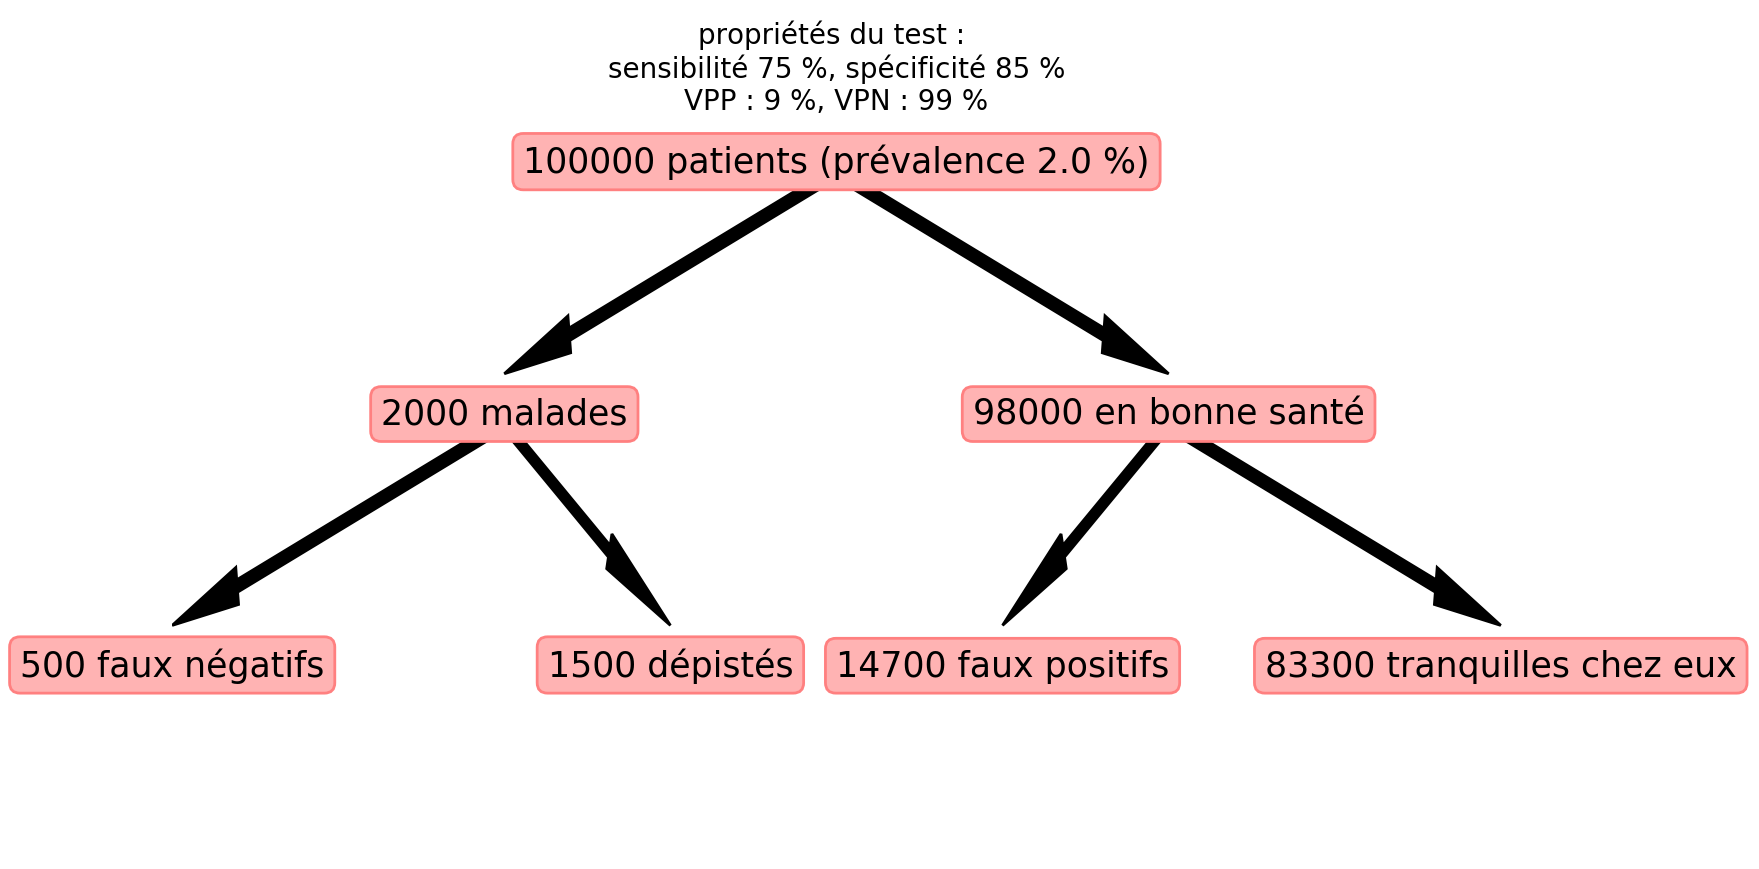

In [19]:
draw_figure(preva=.02, sensi=.75, speci=.85)

## Colorectal

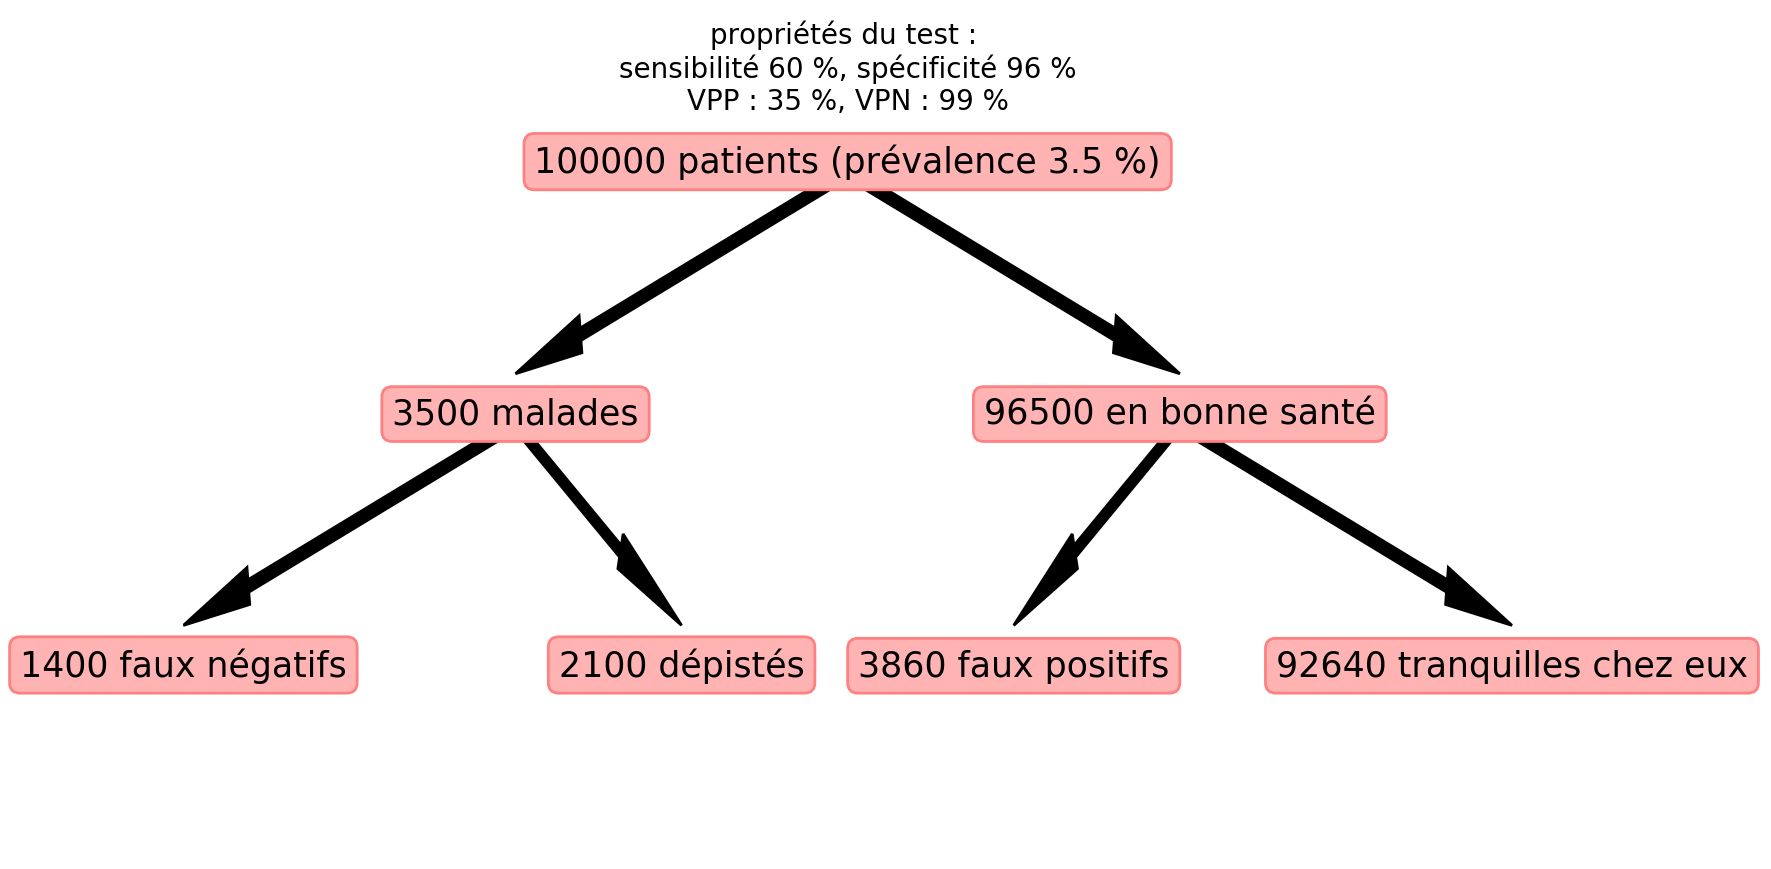

In [20]:
draw_figure(preva=.035, sensi=.60, speci=.96)

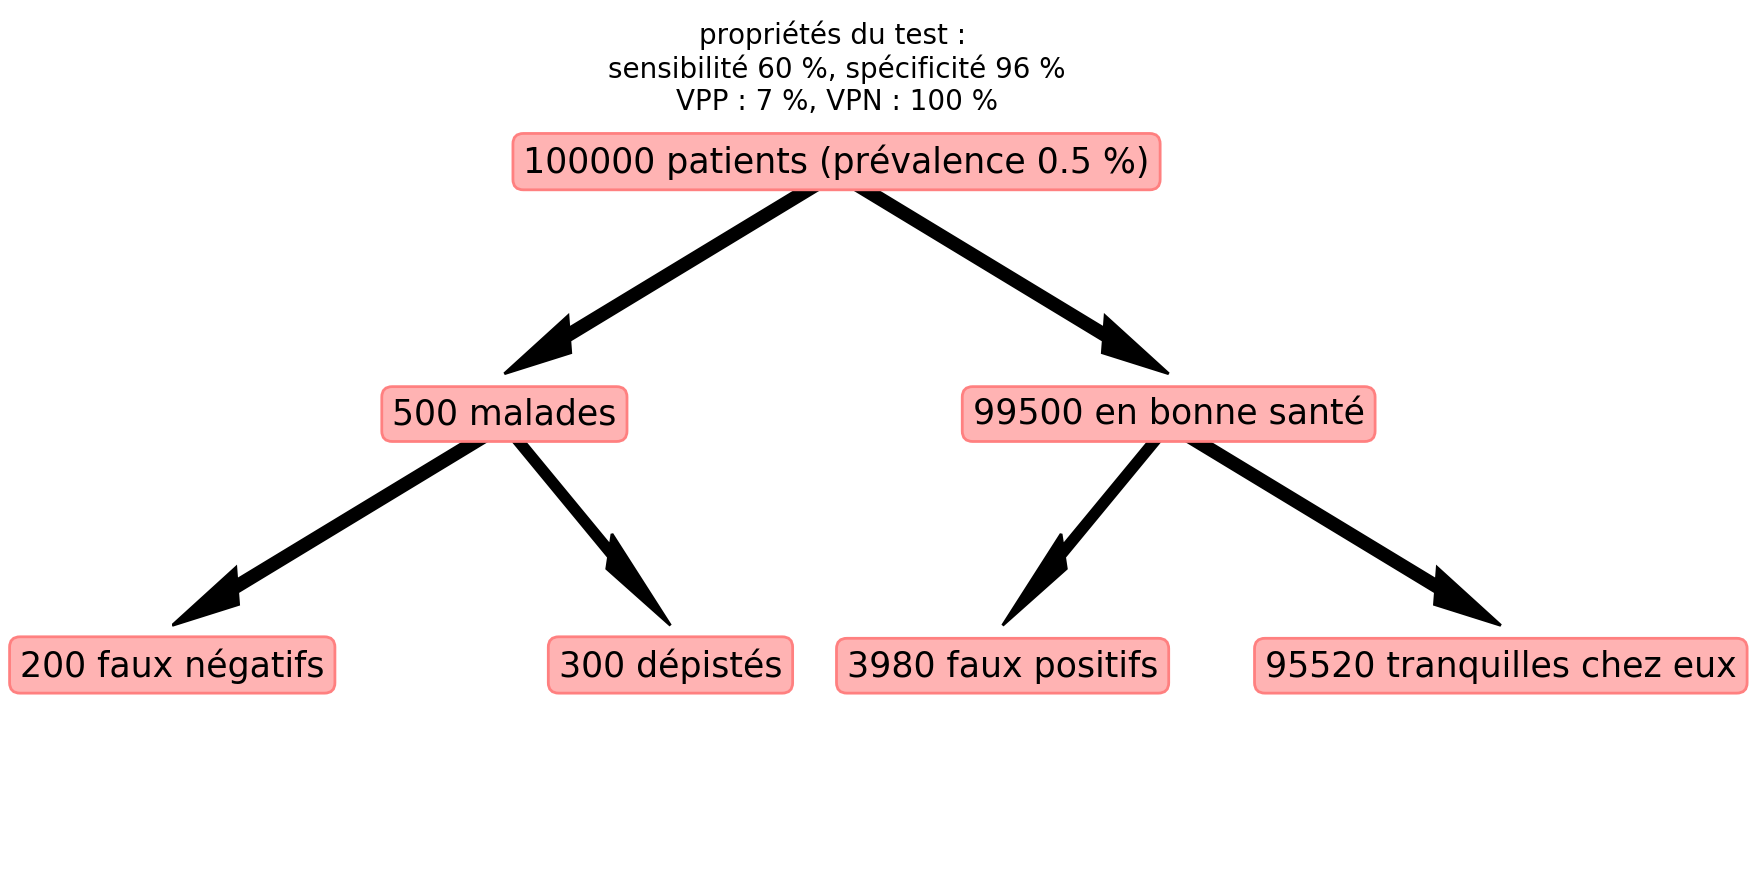

In [21]:
draw_figure(preva=.005, sensi=.60, speci=.96)

# Le deuxième test : de confirmation

![confirmation](http://www.jaddo.fr/wp-content/uploads/2016/03/vpp-vpn-etape2.png)

In [22]:
@interact
def draw_figure_confirmation(sensi = (0.01, 1., 0.01), speci = (0.01, 1., 0.01), true_pos_depi=fixed(900), false_pos_depi=fixed(4950)):

    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111, autoscale_on=False, xlim=(-15, 20), ylim=(-5, 1))

    # plotting options
    bbox_dict = dict(boxstyle="round",
                                fc=(0.1, 0.8, 0.1),
                                ec=(0., 0., 0.))
    size = 12
    dx = 7.5
    dy = 2

    # test data
    n = true_pos_depi + false_pos_depi
    sick = true_pos_depi
    healthy = n - sick
    true_pos = sick * sensi
    false_neg = sick * (1 - sensi)
    true_neg = healthy * speci
    false_pos = healthy * (1 - speci)
    true_pos, false_neg, true_neg, false_pos

    ann = ax.annotate('{:n} patients dépistage positif)'.format(n, preva * 100),
                      xy=(0., 0), xycoords='data', ha='center',
                      size=size,
                      bbox=bbox_dict)

    ax.annotate('{:n} malades'.format(sick),
                      xy=(-dx, -dy), xycoords='data', ha='center',
                      size=size,
                      bbox=bbox_dict)

    ax.annotate('{:n} en bonne santé'.format(healthy),
                      xy=(dx, -dy), xycoords='data', ha='center',
                      size=size,
                      bbox=bbox_dict)


    ax.annotate('{:n} faux négatifs'.format(false_neg),
                      xy=(-2*dx, -2*dy), xycoords='data', ha='center',
                      size=size,
                      bbox=bbox_dict)

    ax.annotate('{:n} diagnostiqués'.format(true_pos),
                      xy=(-0.6*dx, -2*dy), xycoords='data', ha='center',
                      size=size,
                      bbox=bbox_dict)

    ax.annotate('{:.0f} faux diagnostics'.format(false_pos),
                      xy=(0.5*dx, -2*dy), xycoords='data', ha='center',
                      size=size,
                      bbox=bbox_dict)

    ax.annotate('{:.0f} rassurés (?)'.format(true_neg),
                      xy=(2*dx, -2*dy), xycoords='data', ha='center',
                      size=size,
                      bbox=bbox_dict)

    arrow_width=0.1
    arrow_hl = 1.5
    plt.arrow(0, 0, dx,  -dy*0.8, length_includes_head=True, width=arrow_width, head_length=arrow_hl, fc='k')
    plt.arrow(0, 0, -dx, -dy*0.8, length_includes_head=True, width=arrow_width, head_length=arrow_hl, fc='k')

    plt.arrow(dx, -dy, dx,  -dy*0.8, length_includes_head=True, width=arrow_width, head_length=arrow_hl, fc='k')
    plt.arrow(dx, -dy, -0.5*dx, -dy*0.8, length_includes_head=True, width=arrow_width, head_length=arrow_hl, fc='k')

    plt.arrow(-dx, -dy, -dx,  -dy*0.8, length_includes_head=True, width=arrow_width, head_length=arrow_hl, fc='k')
    plt.arrow(-dx, -dy, 0.5*dx, -dy*0.8, length_includes_head=True, width=arrow_width, head_length=arrow_hl, fc='k')
    vpp, vpn = compute_vpp_vpn(preva, sensi, speci)
    plt.text(0, 0.5, "propriétés du test de confirmation : \nsensibilité {:.0f} %, spécificité {:.0f} %\nVPP : {:.0f} %, VPN : {:.0f} %".format(sensi * 100, speci * 100, vpp*100, vpn*100), ha='center')
    plt.axis('off')
    plt.show()

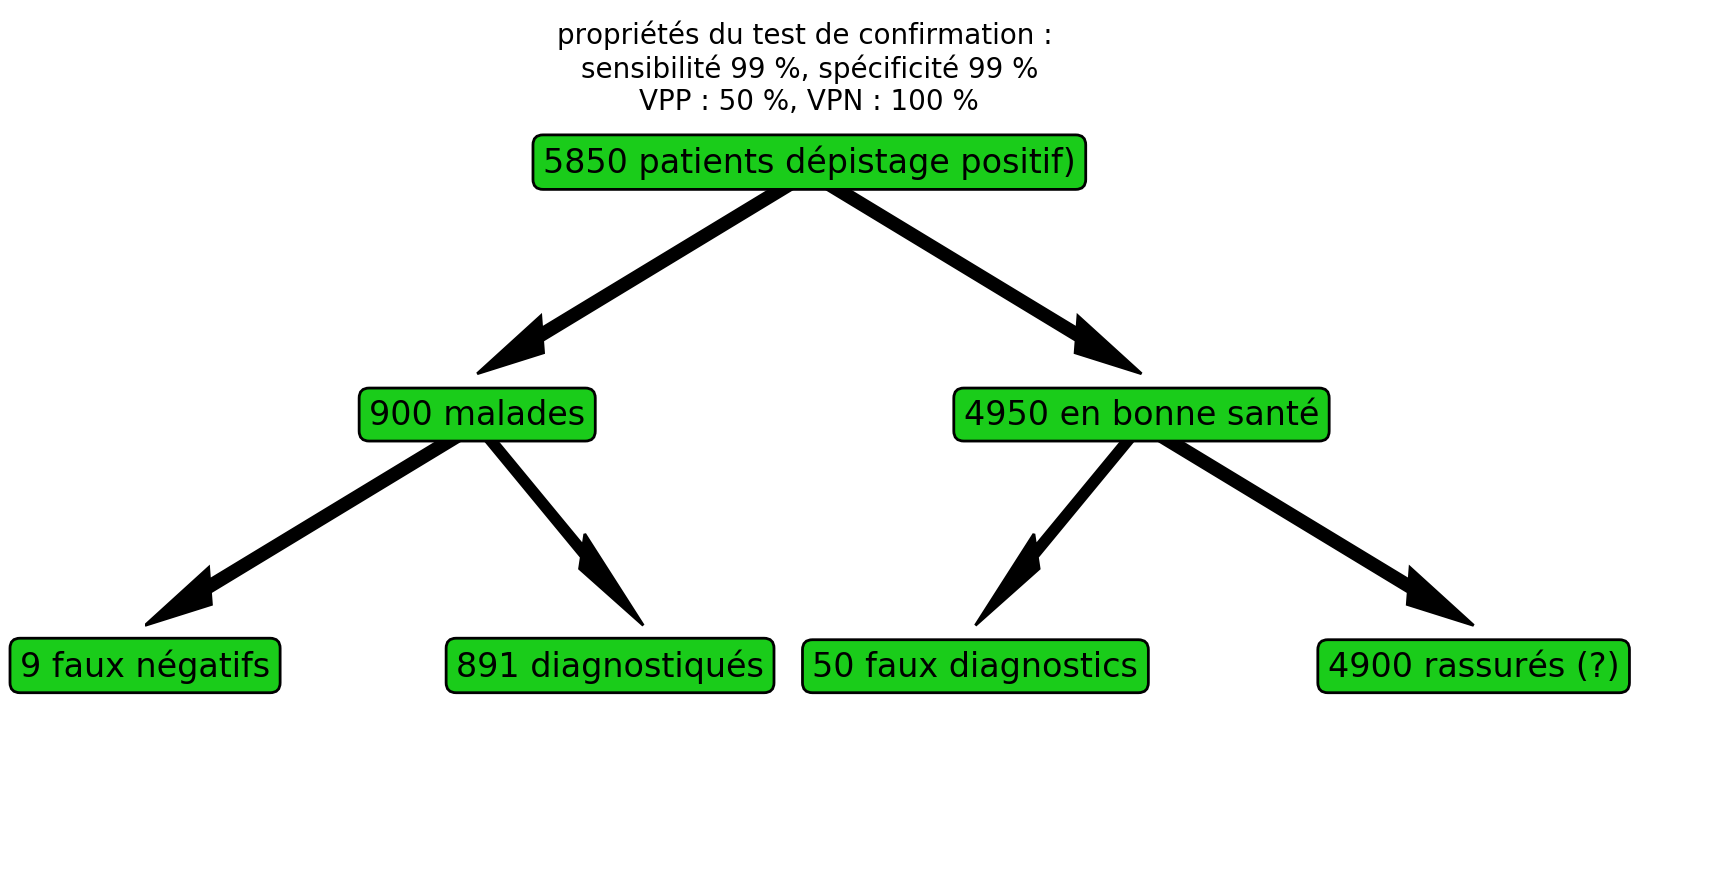

In [23]:
draw_figure_confirmation(sensi=0.99, speci=0.99, true_pos_depi=900, false_pos_depi=4950)

# sankey ? 

http://flothesof.github.io/sankey-tutorial-matplotlib.html

In [31]:
from matplotlib.sankey import Sankey

[Bunch(patch=Poly((75, 4.75) ...), flows=[100000 -99000  -1000], angles=[-1.0, -1.0, -1.0], tips=[[  1.38065257e-15  -2.25477676e+01]
  [  7.50000000e-01  -4.17857090e+01]
  [ -7.42500000e+01  -2.47838968e+01]], text=Text(0,0,''), texts=[<matplotlib.text.Text object at 0x11ac6e2b0>, <matplotlib.text.Text object at 0x11ac6e278>, <matplotlib.text.Text object at 0x11ac6e6d8>])]

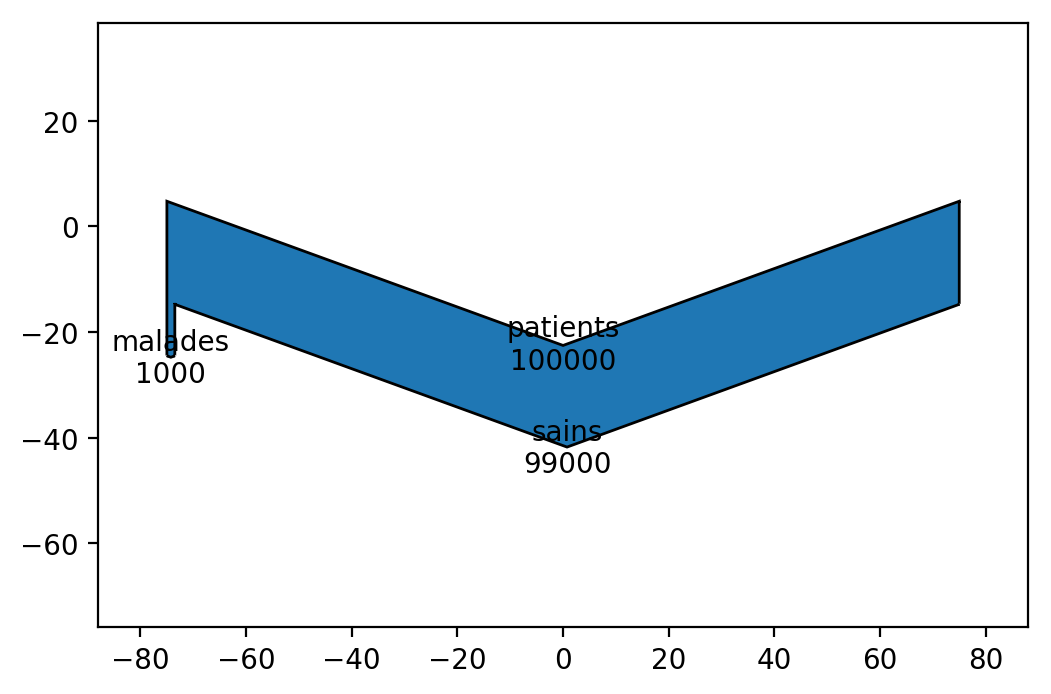

In [59]:
fig, ax = plt.subplots()
sankey = Sankey(ax=ax, scale=0.0015, head_angle=140, margin=13)
sankey.add(flows=[100000, -99000, -1000],
       labels=['patients', 'sains', 'malades'],
          orientations=[0, 0, 0],
          rotation=-90,
          trunklength=10.,
          pathlengths=[0, 10, 10],
          )
sankey.finish()

(-69.520770818713231, 5.1500000000000012)

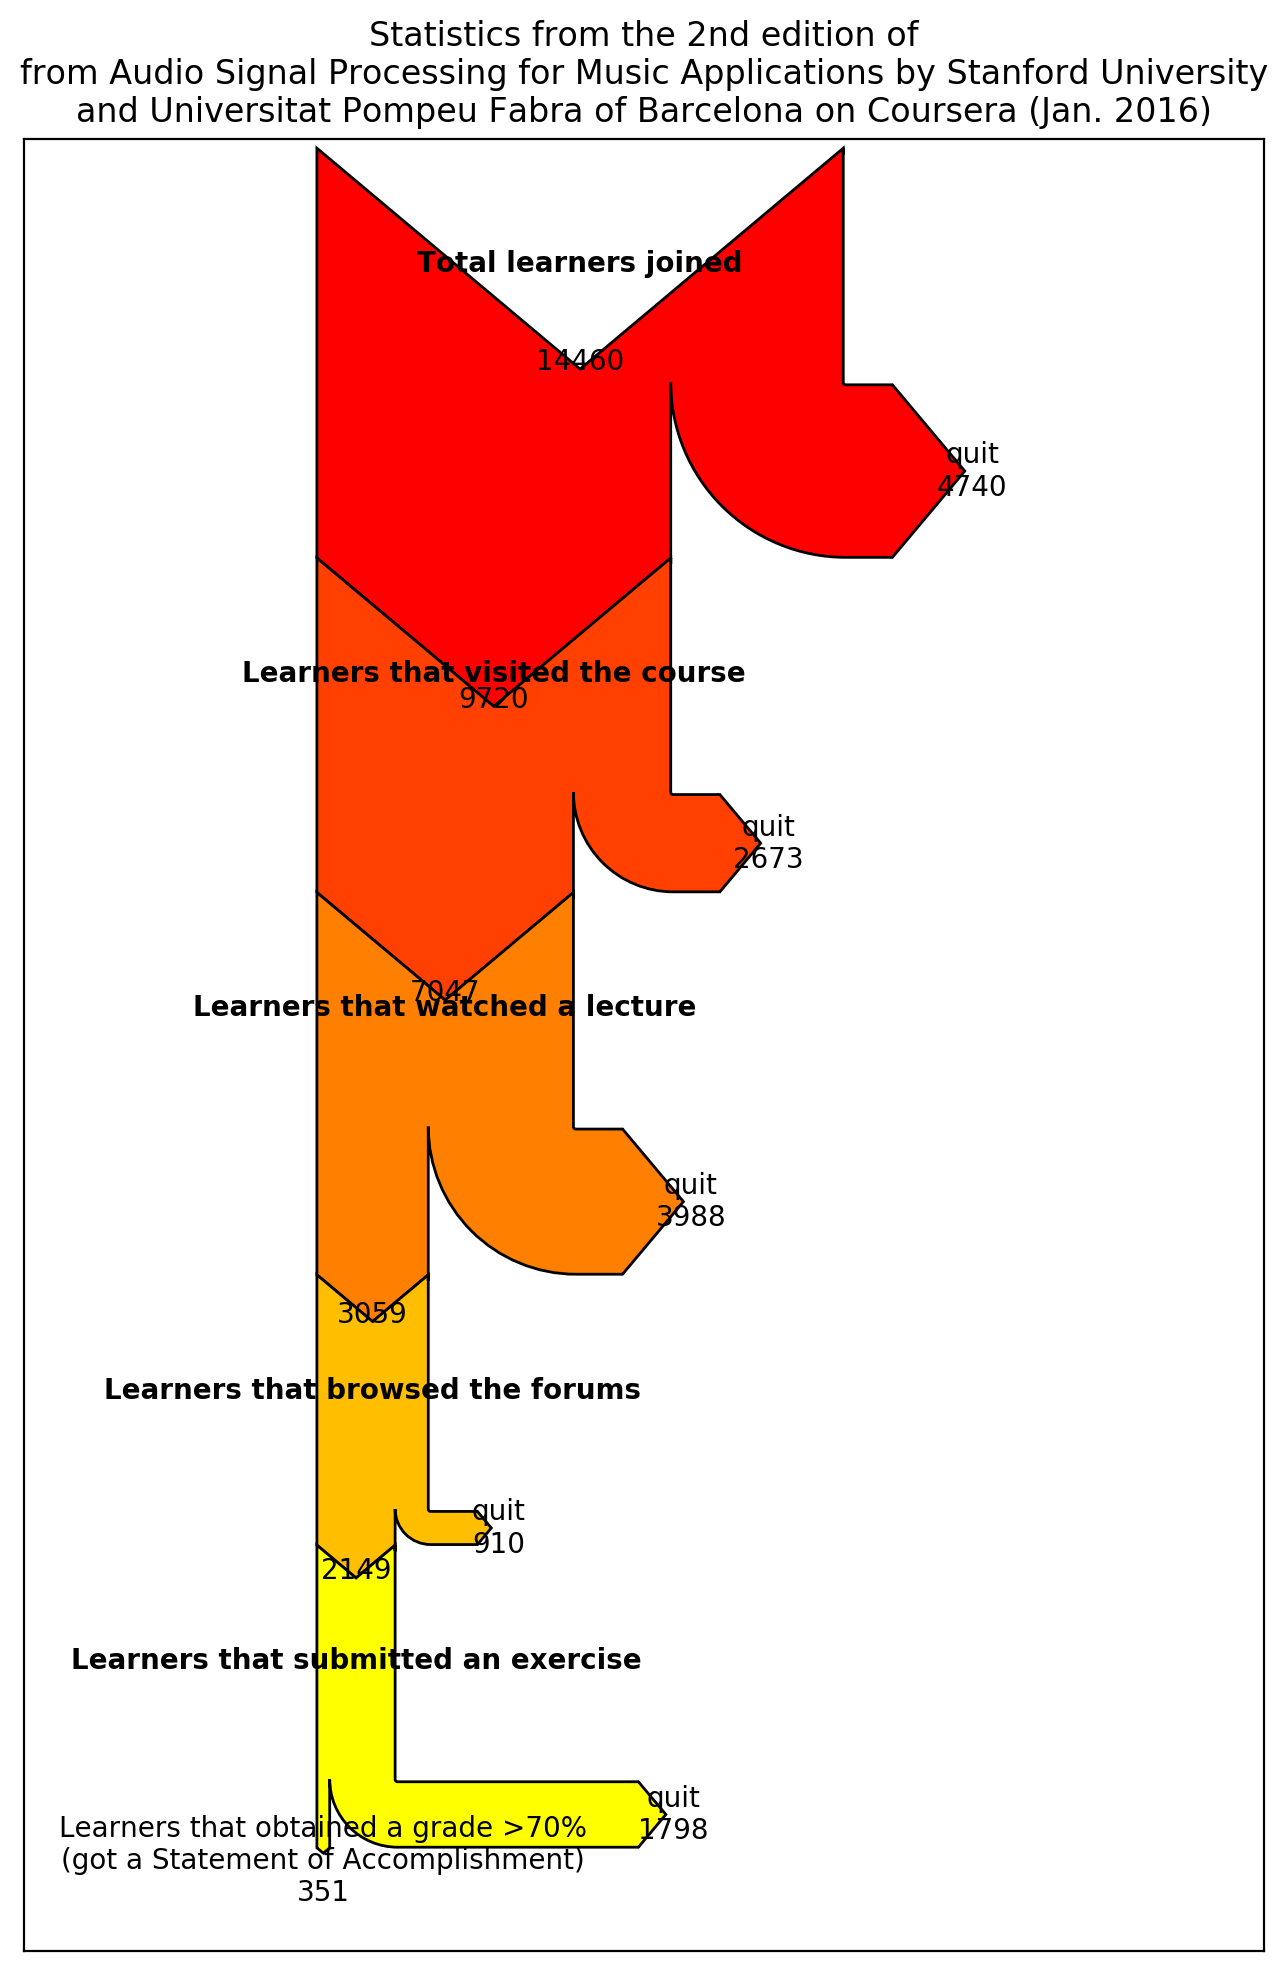

In [24]:
fig = plt.figure(figsize=(8, 12))
ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[],
                     title="Statistics from the 2nd edition of\nfrom Audio Signal Processing for Music Applications by Stanford University\nand Universitat Pompeu Fabra of Barcelona on Coursera (Jan. 2016)")
learners = [14460, 9720, 7047, 3059, 2149, 351]
labels = ["Total learners joined", "Learners that visited the course", "Learners that watched a lecture",
         "Learners that browsed the forums", "Learners that submitted an exercise", 
          "Learners that obtained a grade >70%\n(got a Statement of Accomplishment)"]
colors = ["#FF0000", "#FF4000", "#FF8000", "#FFBF00", "#FFFF00"]

sankey = Sankey(ax=ax, scale=0.0015, offset=0.3)
for input_learner, output_learner, label, prior, color in zip(learners[:-1], learners[1:], 
                                                              labels, [None, 0, 1, 2, 3],
                                                             colors):
    if prior != 3:
        sankey.add(flows=[input_learner, -output_learner, output_learner - input_learner],
               orientations=[0, 0, 1],
               patchlabel=label,
               labels=['', None, 'quit'],
              prior=prior,
              connect=(1, 0),
               pathlengths=[0, 0, 2],
              trunklength=10.,
              rotation=-90,
                  facecolor=color)
    else:
        sankey.add(flows=[input_learner, -output_learner, output_learner - input_learner],
               orientations=[0, 0, 1],
               patchlabel=label,
               labels=['', labels[-1], 'quit'],
              prior=prior,
              connect=(1, 0),
               pathlengths=[0, 0, 10],
              trunklength=10.,
              rotation=-90,
                  facecolor=color)
diagrams = sankey.finish()
for diagram in diagrams:
    diagram.text.set_fontweight('bold')
    diagram.text.set_fontsize('10')
    for text in diagram.texts:
        text.set_fontsize('10')
ylim = plt.ylim()
plt.ylim(ylim[0]*1.05, ylim[1])